In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 23 16:33:17 2020

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-13b88862eb3d>, line 3)

In [2]:
@author: ka2461
"""

SyntaxError: invalid syntax (<ipython-input-2-f8f39467a08f>, line 1)

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale

C:\Users\user\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
sns.set(style="whitegrid")

In [3]:
abb_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\data_codes.csv'
zc_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\lvl1-TR.geojson'

In [4]:
lst = pd.read_csv(abb_link)
lst.zipcode.astype(int)
  
price=[i for i in lst if 'price-' in i]
price

aves = lst.groupby('zipcode')[price].mean()

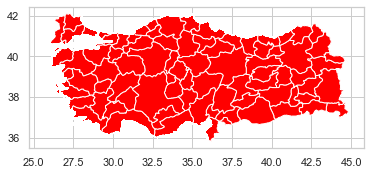

In [5]:
zc = gpd.read_file(zc_link)
zc.plot(color='red');

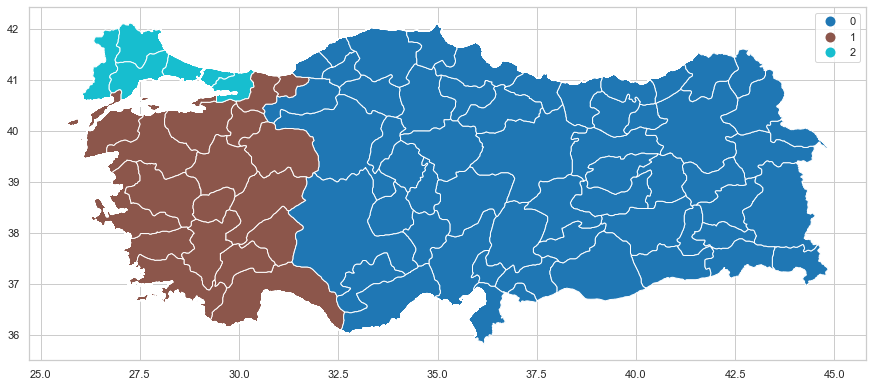

In [6]:
zdb = zc[['geometry', 'zipcode', 'Name']].join(aves, on='zipcode')\
                                         .dropna()

km5 = cluster.KMeans(n_clusters=3)
km5cls = km5.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km5cls.fit(aves)
zc.plot(column = km5cls.labels_, categorical = True, figsize = (15, 15), legend = True)

In [7]:
df1 = pd.DataFrame(zdb.drop(columns='geometry'))
df1['Labels'] = km5cls.labels_
list_0=[]
list_1=[]
list_2=[]

for j in range(len(df1)):
    if(df1['Labels'].iloc[j]==0):

        list_0.append(df1[price].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==1):

        list_1.append(df1[price].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==2):

        list_2.append(df1[price].iloc[j].mean())
            
print("KMeans Method with 3 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 0 Max Value: ",np.max(list_0))
print("Label 0 Min Value: ",np.min(list_0))
print("Label 0 Standard Dev Value: ",np.std(list_0))
print("Label 0 Variance Value: ",np.var(list_0))
print("Label 0 Median Value: ",np.median(list_0))
print("Label 0 Percentile Value: ",np.percentile(list_0,25))
print("Label 0 Percentile Value: ",np.percentile(list_0,75))
print("Label 1 Average Value: ",np.mean(list_1))
print("Label 1 Max Value: ",np.max(list_1))
print("Label 1 Min Value: ",np.min(list_1))
print("Label 1 Standard Dev Value: ",np.std(list_1))
print("Label 1 Variance Value: ",np.var(list_1))
print("Label 1 Median Value: ",np.median(list_1))
print("Label 1 Percentile Value: ",np.percentile(list_1,25))
print("Label 1 Percentile Value: ",np.percentile(list_1,75))
print("Label 2 Average Value: ",np.mean(list_2))
print("Label 2 Max Value: ",np.max(list_2))
print("Label 2 Min Value: ",np.min(list_2))
print("Label 2 Standard Dev Value: ",np.std(list_2))
print("Label 2 Variance Value: ",np.var(list_2))
print("Label 2 Median Value: ",np.median(list_2))
print("Label 2 Percentile Value: ",np.percentile(list_2,25))
print("Label 2 Percentile Value: ",np.percentile(list_2,75))

KMeans Method with 3 cluster

Label 0 Average Value:  17.768316925010232
Label 0 Max Value:  21.906178502916664
Label 0 Min Value:  10.48812804275
Label 0 Standard Dev Value:  2.1376881268592176
Label 0 Variance Value:  4.569710527714871
Label 0 Median Value:  17.45345721
Label 0 Percentile Value:  16.47139196708334
Label 0 Percentile Value:  19.456856383333335
Label 1 Average Value:  27.741803021929826
Label 1 Max Value:  34.148478562499996
Label 1 Min Value:  23.344772219583337
Label 1 Standard Dev Value:  2.598921234084435
Label 1 Variance Value:  6.754391580974964
Label 1 Median Value:  27.231337067083327
Label 1 Percentile Value:  26.176032780833328
Label 1 Percentile Value:  29.47583474229166
Label 2 Average Value:  40.79896511441667
Label 2 Max Value:  42.501079465833335
Label 2 Min Value:  37.58176038875
Label 2 Standard Dev Value:  1.7693006568385832
Label 2 Variance Value:  3.130424814289442
Label 2 Median Value:  41.57757585625
Label 2 Percentile Value:  40.29339466874999
La

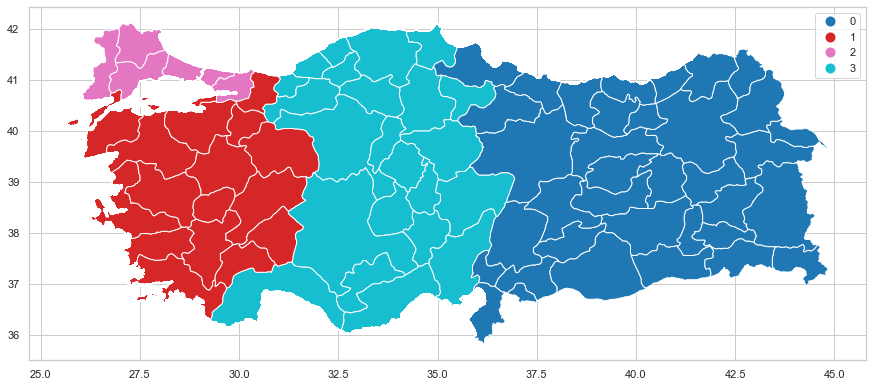

In [8]:
km2 = cluster.KMeans(n_clusters=4)
km2cls = km2.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km2cls.fit(aves)
zc.plot(column = km2cls.labels_, categorical = True, figsize = (15, 15), legend = True)

In [9]:
df1 = pd.DataFrame(zdb.drop(columns='geometry'))
df1['Labels'] = km2cls.labels_
list_0=[]
list_1=[]
list_2=[]
list_3=[]

for j in range(len(df1)):
    if(df1['Labels'].iloc[j]==0):

        list_0.append(df1[price].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==1):

        list_1.append(df1[price].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==2):

        list_2.append(df1[price].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==3):

        list_3.append(df1[price].iloc[j].mean())
            
print("KMeans Method with 4 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 0 Max Value: ",np.max(list_0))
print("Label 0 Min Value: ",np.min(list_0))
print("Label 0 Standard Dev Value: ",np.std(list_0))
print("Label 0 Variance Value: ",np.var(list_0))
print("Label 0 Median Value: ",np.median(list_0))
print("Label 0 Percentile Value: ",np.percentile(list_0,25))
print("Label 0 Percentile Value: ",np.percentile(list_0,75))
print("Label 1 Average Value: ",np.mean(list_1))
print("Label 1 Max Value: ",np.max(list_1))
print("Label 1 Min Value: ",np.min(list_1))
print("Label 1 Standard Dev Value: ",np.std(list_1))
print("Label 1 Variance Value: ",np.var(list_1))
print("Label 1 Median Value: ",np.median(list_1))
print("Label 1 Percentile Value: ",np.percentile(list_1,25))
print("Label 1 Percentile Value: ",np.percentile(list_1,75))
print("Label 2 Average Value: ",np.mean(list_2))
print("Label 2 Max Value: ",np.max(list_2))
print("Label 2 Min Value: ",np.min(list_2))
print("Label 2 Standard Dev Value: ",np.std(list_2))
print("Label 2 Variance Value: ",np.var(list_2))
print("Label 2 Median Value: ",np.median(list_2))
print("Label 2 Percentile Value: ",np.percentile(list_2,25))
print("Label 2 Percentile Value: ",np.percentile(list_2,75))
print("Label 3 Average Value: ",np.mean(list_3))
print("Label 3 Max Value: ",np.max(list_3))
print("Label 3 Min Value: ",np.min(list_3))
print("Label 3 Standard Dev Value: ",np.std(list_3))
print("Label 3 Variance Value: ",np.var(list_3))
print("Label 3 Median Value: ",np.median(list_3))
print("Label 3 Percentile Value: ",np.percentile(list_3,25))
print("Label 3 Percentile Value: ",np.percentile(list_3,75))

KMeans Method with 4 cluster

Label 0 Average Value:  16.476188541210647
Label 0 Max Value:  18.53438826125
Label 0 Min Value:  10.48812804275
Label 0 Standard Dev Value:  1.4958183438487407
Label 0 Variance Value:  2.2374725177943895
Label 0 Median Value:  16.509340903125
Label 0 Percentile Value:  16.395012961354166
Label 0 Percentile Value:  16.942329610312502
Label 1 Average Value:  28.24538838779411
Label 1 Max Value:  34.148478562499996
Label 1 Min Value:  25.125140776250003
Label 1 Standard Dev Value:  2.2667696264226675
Label 1 Variance Value:  5.13824453927236
Label 1 Median Value:  27.932007791666663
Label 1 Percentile Value:  26.592140673333333
Label 1 Percentile Value:  29.894483744999988
Label 2 Average Value:  40.79896511441667
Label 2 Max Value:  42.501079465833335
Label 2 Min Value:  37.58176038875
Label 2 Standard Dev Value:  1.7693006568385832
Label 2 Variance Value:  3.130424814289442
Label 2 Median Value:  41.57757585625
Label 2 Percentile Value:  40.29339466874999
